# Filling in the Gaussian discriminant class (univariate) and test it.

In [1]:
import numpy as np
import discriminants
import matplotlib.pyplot as plt

mu, sigma = 60, 5 
restHr = np.random.normal(mu, sigma, 1000)

mu, sigma = 100, 5
stressHr = np.random.normal(mu, sigma, 1000)

In [2]:
restDisc = discriminants.GaussianDiscriminant(restHr, prior=0.5, name="Resting")
stressDisc = discriminants.GaussianDiscriminant(stressHr, prior=0.5, name="Stressed")

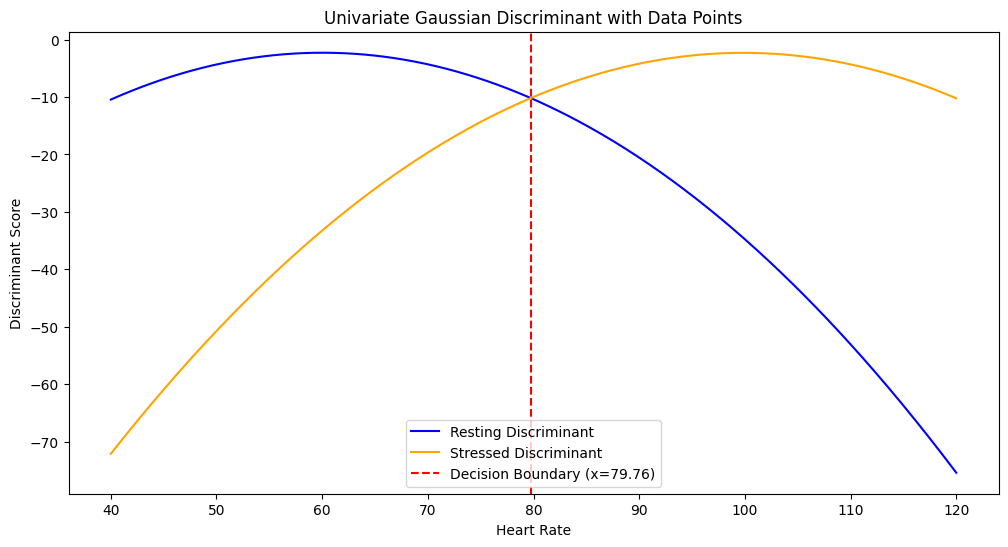

In [3]:
xVal = np.linspace(40, 120, 500)
restG = [restDisc.calc_discriminant(x) for x in xVal]
stressG = [stressDisc.calc_discriminant(x) for x in xVal]

plt.figure(figsize=(12, 6))

plt.plot(xVal, restG, label="Resting Discriminant", color='blue')
plt.plot(xVal, stressG, label="Stressed Discriminant", color='orange')

dbound= xVal[np.argmin(np.abs(np.array(restG) - np.array(stressG)))]
plt.axvline(dbound, color='red', linestyle='--', label=f"Decision Boundary (x={dbound:.2f})")

plt.legend()
plt.title("Univariate Gaussian Discriminant with Data Points")
plt.xlabel("Heart Rate")
plt.ylabel("Discriminant Score")
plt.show()

## Why do the two disciminants cross at 80 and why there is a parabolic shape to each discriminant plot


The two discriminants cross at 80 (approximately in the program) because it is the point where the two classes' conditional probability densities are equal. This basically occurs when the likelihood for both resting and stressed distributions are identical meaning they have the same prior probabilities. We know that to find a decision boundary, we need to set the two discriminant functions equal. So $ g_{1}(x) = g_{2}(x) $. Here we solve $ x $ and as we have equal variance, we consider the means which are 60 and 100. So the decision boundary lies in between them, at $ x = \frac {60 + 100} {2} = 80 $. 

And the parabolic shape occurs because the discriminants are derived from the log of the Gaussian Density Function. This log is of a quadratic nature which can be seen in the equation. 

$ log(p(x)) = -\frac{(x - \mu)^2}{2\sigma^2} $

This dependence on $ x $ gives the discriminant parabolic or U-shaped form. The peak of the discriminant has the class mean as shown in the figure.

(The approximation of the boundary is because of the noise present in the random data.)

# Filling in the Gaussian discriminant class (Multivariate) and test it.

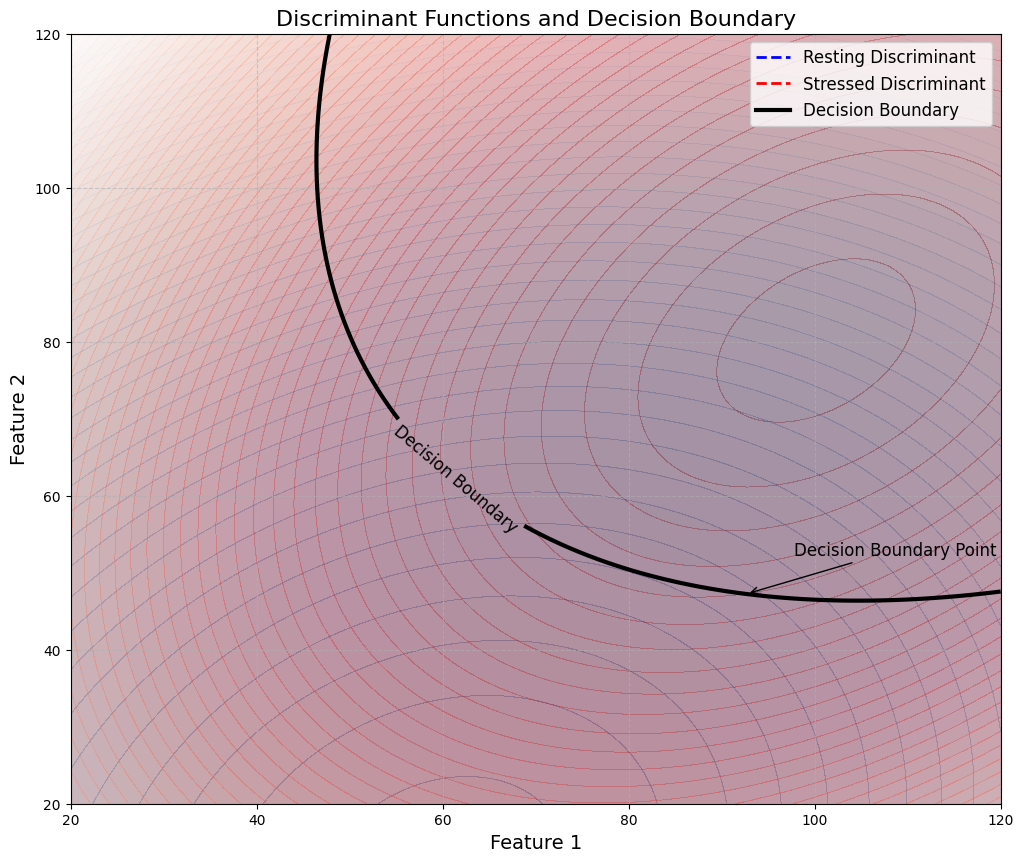

In [4]:
muRest = np.array([60, 10])
sigmaRest = np.array([[100, 20], [20, 100]])

muStress = np.array([100, 80])
sigmaStress = np.array([[50, 20], [20, 50]])

dataRest = np.random.multivariate_normal(muRest, sigmaRest, 1000)
dataStress = np.random.multivariate_normal(muStress, sigmaStress, 1000)

r = discriminants.MultivariateGaussian(dataRest, prior=0.5, name='Resting')

s = discriminants.MultivariateGaussian(dataStress, prior=0.5, name='Stressed')

x = np.linspace(20, 120, 100)
y = np.linspace(20, 120, 100)
X, Y = np.meshgrid(x, y)
gpoints = np.c_[X.ravel(), Y.ravel()]

gRest = []
gStress = []

for point in gpoints:
    gRest.append(r.calc_discriminant(point))
    gStress.append(s.calc_discriminant(point))

gRest = np.array(gRest)
gStress = np.array(gStress)
gRest = gRest.reshape(X.shape)
gStress = gStress.reshape(X.shape)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10))

plt.contourf(X, Y, gRest, levels=50, alpha=0.3, cmap='Blues')
plt.contourf(X, Y, gStress, levels=50, alpha=0.3, cmap='Reds')

cRest = plt.contour(X, Y, gRest, levels=[0], colors='blue', linestyles='--', linewidths=2)
cStress = plt.contour(X, Y, gStress, levels=[0], colors='red', linestyles='--', linewidths=2)

dbound = plt.contour(X, Y, gRest - gStress, levels=[0], colors='black', linewidths=3)
plt.clabel(dbound, fmt='Decision Boundary', inline=True, fontsize=12)

dpoint = np.argwhere(np.isclose(gRest - gStress, 0, atol=0.1))[0]
dx, dy = X[dpoint[0], dpoint[1]], Y[dpoint[0], dpoint[1]]
plt.annotate('Decision Boundary Point', xy=(dx, dy), xytext=(dx + 5, dy + 5), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')

plt.title('Discriminant Functions and Decision Boundary', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

from matplotlib.lines import Line2D
custlines = [Line2D([0], [0], color='blue', lw=2, linestyle='--'),
                Line2D([0], [0], color='red', lw=2, linestyle='--'),
                Line2D([0], [0], color='black', lw=3)]
plt.legend(custlines, ['Resting Discriminant', 'Stressed Discriminant', 'Decision Boundary'], loc='upper right', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Here the threshold shows the uncertainty region around the Decision Boundary

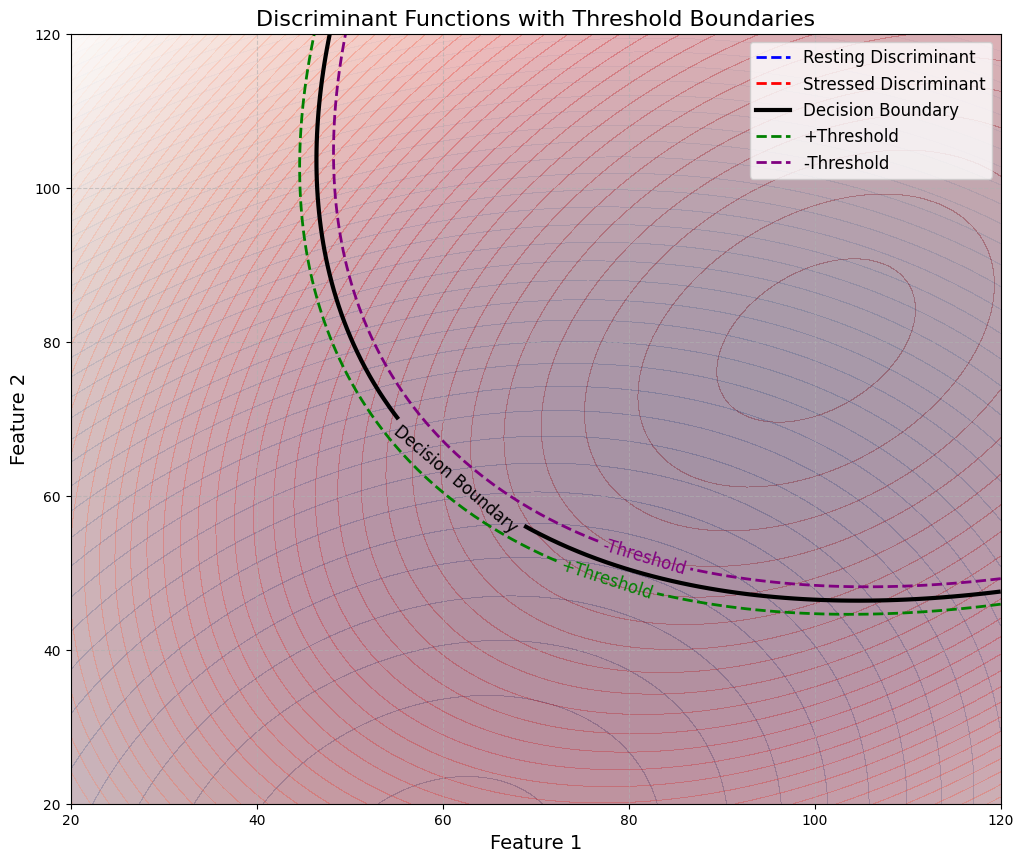

In [5]:
threshold = 2.0 

plt.figure(figsize=(12, 10))

plt.contourf(X, Y, gRest, levels=50, alpha=0.3, cmap='Blues')
plt.contourf(X, Y, gStress, levels=50, alpha=0.3, cmap='Reds')

dbound = plt.contour(X, Y, gRest - gStress, levels=[0], colors='black', linewidths=3)
plt.clabel(dbound, fmt='Decision Boundary', inline=True, fontsize=12)

upper = plt.contour(X, Y, gRest - gStress, levels=[threshold], colors='green', linestyles='--', linewidths=2)
lower = plt.contour(X, Y, gRest - gStress, levels=[-threshold], colors='purple', linestyles='--', linewidths=2)

plt.clabel(upper, fmt='+Threshold', inline=True, fontsize=12)
plt.clabel(lower, fmt='-Threshold', inline=True, fontsize=12)

plt.title('Discriminant Functions with Threshold Boundaries', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

from matplotlib.lines import Line2D
custlines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='--'),
    Line2D([0], [0], color='red', lw=2, linestyle='--'),
    Line2D([0], [0], color='black', lw=3),
    Line2D([0], [0], color='green', lw=2, linestyle='--'),
    Line2D([0], [0], color='purple', lw=2, linestyle='--'),
]
plt.legend(custlines, ['Resting Discriminant', 'Stressed Discriminant', 'Decision Boundary', '+Threshold', '-Threshold'], 
           loc='upper right', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Filling in the Discriminant Classifier class. The set classes function may be useful for you to use/implement without having to refit data each time.

In [6]:
from classifiers1 import DiscriminantClassifier
import numpy as np
import matplotlib.pyplot as plt

• Is the code usable for more than two classes?

Yes, Because I am using label_key in the fit function, which gives me all the classes that are in the dataset. And even if I use the set_classes function, I can still send multiple discriminant objects to store so it is usable for more than two classes.

• How does the code pool variances together? 

Pooling variances together means to combine the variance (or covariance) of different classes into a single covariance shared by all classes. This is done when we assume that the classes have the same covariance structure. In multivariate discriminant analysis, each class has it's own covariance. So the pooled covariance matrix is the weighted average of the covariance matrices of each class with the number of samples in each class as weights.

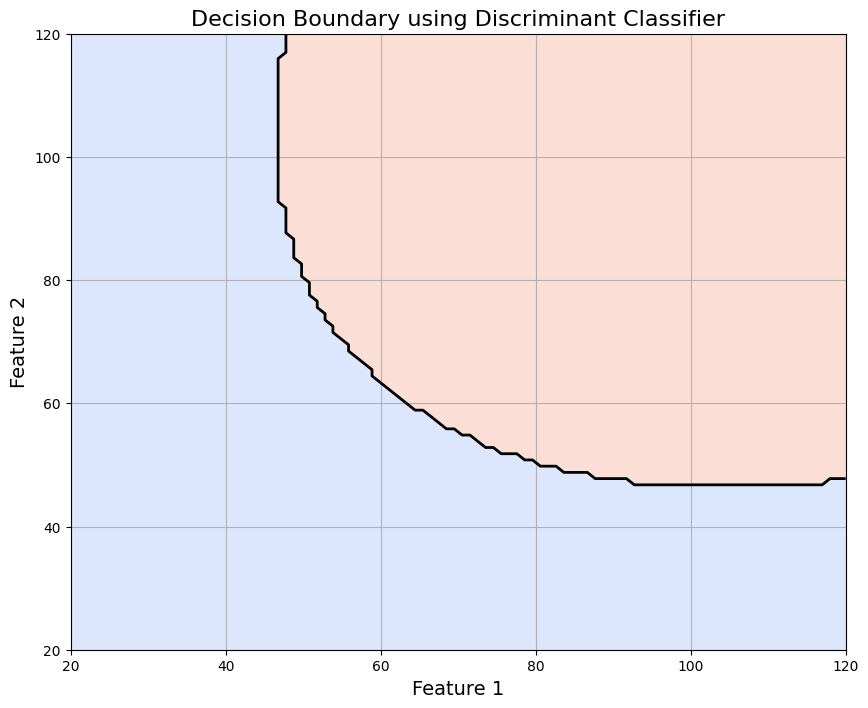

In [7]:
classifier = DiscriminantClassifier()
classifier.set_classes(r, s)

x = np.linspace(20, 120, 100)
y = np.linspace(20, 120, 100)
X, Y = np.meshgrid(x, y)
gpoints = np.c_[X.ravel(), Y.ravel()]

predictions = []
for point in gpoints:
    predictions.append(classifier.predict(point))

predictions = np.array(predictions).reshape(X.shape)

cmap = {'Resting': 0, 'Stressed': 1}
npredictions = np.vectorize(cmap.get)(predictions)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, npredictions, levels=np.linspace(0, 1, 3), cmap='coolwarm', alpha=0.3)

plt.contour(X, Y, npredictions, levels=[0.5], colors='black', linewidths=2)

plt.title('Decision Boundary using Discriminant Classifier', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid(True)
plt.show()

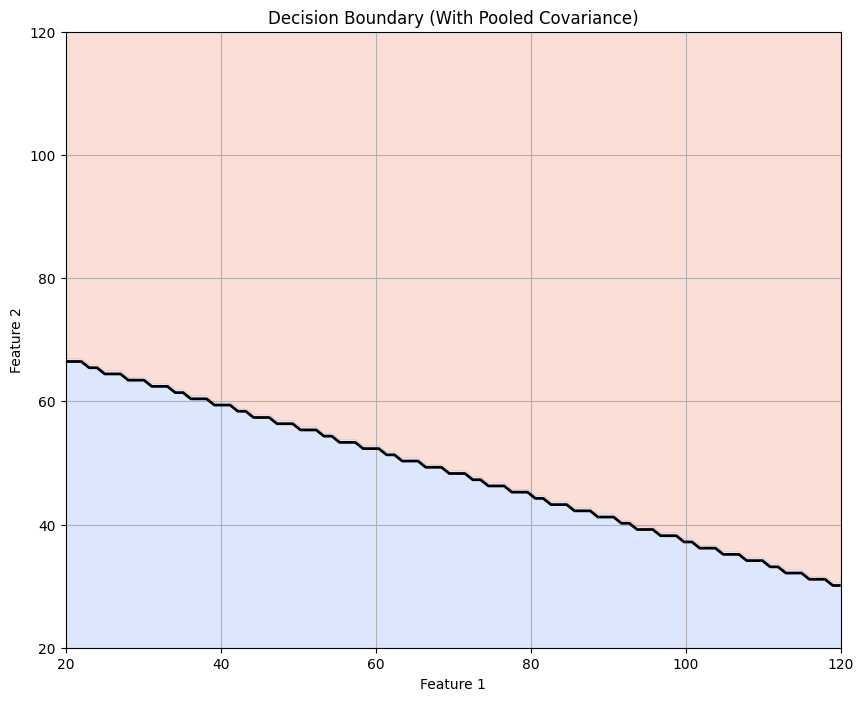

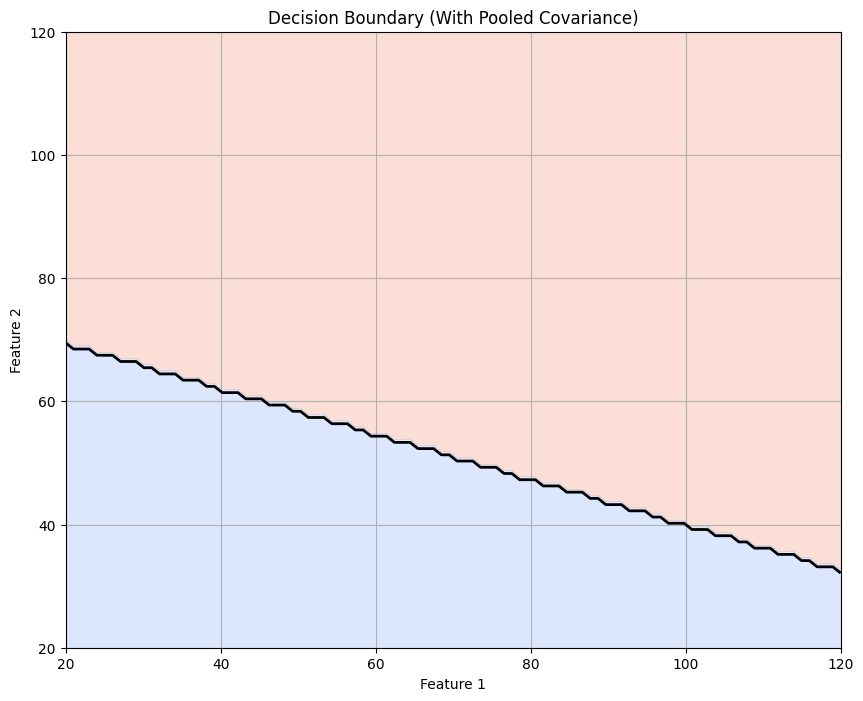

In [8]:
classifier.pool_variances()

predpooled = []
for point in gpoints:
    predpooled.append(classifier.predict(point))

dmapPool = np.array(predpooled).reshape(X.shape)

cmap = {'Resting': 0, 'Stressed': 1}
pooledNpred = np.vectorize(cmap.get)(dmapPool)

plt.figure(figsize=(10, 8))
levels = np.linspace(0, 1, 3)
plt.contourf(X, Y, pooledNpred, levels=levels, cmap='coolwarm', alpha=0.3)
plt.contour(X, Y, pooledNpred, levels=[0], colors='black', linewidths=2)
plt.title('Decision Boundary (With Pooled Covariance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


classifier.classes['Resting'].params['prior'] = 0.9
classifier.classes['Stressed'].params['prior'] = 0.1

predadjusted = []
for point in gpoints:
    predadjusted.append(classifier.predict(point))

dmapadjusted = np.array(predadjusted).reshape(X.shape)

cmap = {'Resting': 0, 'Stressed': 1}
pooledNprior = np.vectorize(cmap.get)(dmapadjusted)

plt.figure(figsize=(10, 8))
levels = np.linspace(0, 1, 3)
plt.contourf(X, Y, pooledNprior, levels=levels, cmap='coolwarm', alpha=0.3)
plt.contour(X, Y, pooledNprior, levels=[0], colors='black', linewidths=2)
plt.title('Decision Boundary (With Pooled Covariance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## Observation:

On comparing the graphs, we can see a lot of changes. The first change is that before applying pooling the graph has a quadratic nature and is in the shape of a parabola (U-shape). But after applying pooling, which means that the covariance is common across all the classes, we can see the decision boundary change into a straight line. This is because after applying the same covariance, the equation becomes similar to a linear discriminant analysis function. And here the straight line is shifted towards Resting because of the difference in mean. (If there is a difference in the covariance, then the curve of the boundary is effected). 

Another change is that, after adjusting the priors we can see that there is a slight shift in the boundary towards the Stress. Because the prior of Resting is given higher value so the function tends to classify the data points as Resting. However, as there is a lot of difference in the distribution and data, the shift is a bit small.

This cannot be seen clearly so I will next try to change the input to see if I can observe this change clearly.

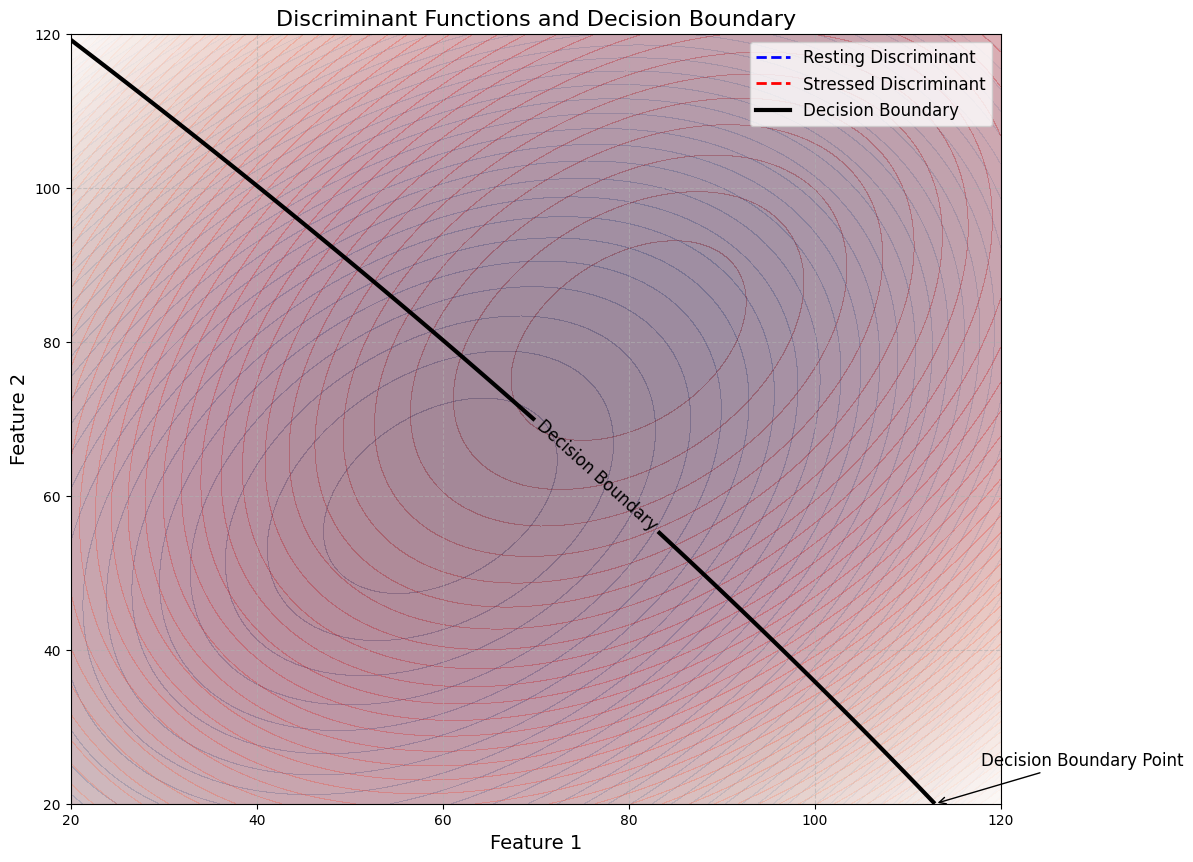

In [9]:
muRest = np.array([60, 60])
sigmaRest = np.array([[50, 20], [20, 50]])

muStress = np.array([80, 80])
sigmaStress = np.array([[50, 20], [20, 50]])

dataRest = np.random.multivariate_normal(muRest, sigmaRest, 1000)
dataStress = np.random.multivariate_normal(muStress, sigmaStress, 1000)

r = discriminants.MultivariateGaussian(dataRest, prior=0.5, name='Resting')
s = discriminants.MultivariateGaussian(dataStress, prior=0.5, name='Stressed')

x = np.linspace(20, 120, 100)
y = np.linspace(20, 120, 100)
X, Y = np.meshgrid(x, y)
gpoints = np.c_[X.ravel(), Y.ravel()]

gRest = []
gStress = []

for point in gpoints:
    gRest.append(r.calc_discriminant(point))
    gStress.append(s.calc_discriminant(point))

gRest = np.array(gRest)
gStress = np.array(gStress)

gRest = gRest.reshape(X.shape)
gStress = gStress.reshape(X.shape)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 10))

plt.contourf(X, Y, gRest, levels=50, alpha=0.3, cmap='Blues')
plt.contourf(X, Y, gStress, levels=50, alpha=0.3, cmap='Reds')

cRest = plt.contour(X, Y, gRest, levels=[0], colors='blue', linestyles='--', linewidths=2)
cStress = plt.contour(X, Y, gStress, levels=[0], colors='red', linestyles='--', linewidths=2)

dbound = plt.contour(X, Y, gRest - gStress, levels=[0], colors='black', linewidths=3)
plt.clabel(dbound, fmt='Decision Boundary', inline=True, fontsize=12)

dpoint = np.argwhere(np.isclose(gRest - gStress, 0, atol=0.1))[0]
dx, dy = X[dpoint[0], dpoint[1]], Y[dpoint[0], dpoint[1]]
plt.annotate('Decision Boundary Point', xy=(dx, dy), xytext=(dx + 5, dy + 5), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='black')

plt.title('Discriminant Functions and Decision Boundary', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

from matplotlib.lines import Line2D
custlines = [Line2D([0], [0], color='blue', lw=2, linestyle='--'),
                Line2D([0], [0], color='red', lw=2, linestyle='--'),
                Line2D([0], [0], color='black', lw=3)]
plt.legend(custlines, ['Resting Discriminant', 'Stressed Discriminant', 'Decision Boundary'], loc='upper right', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

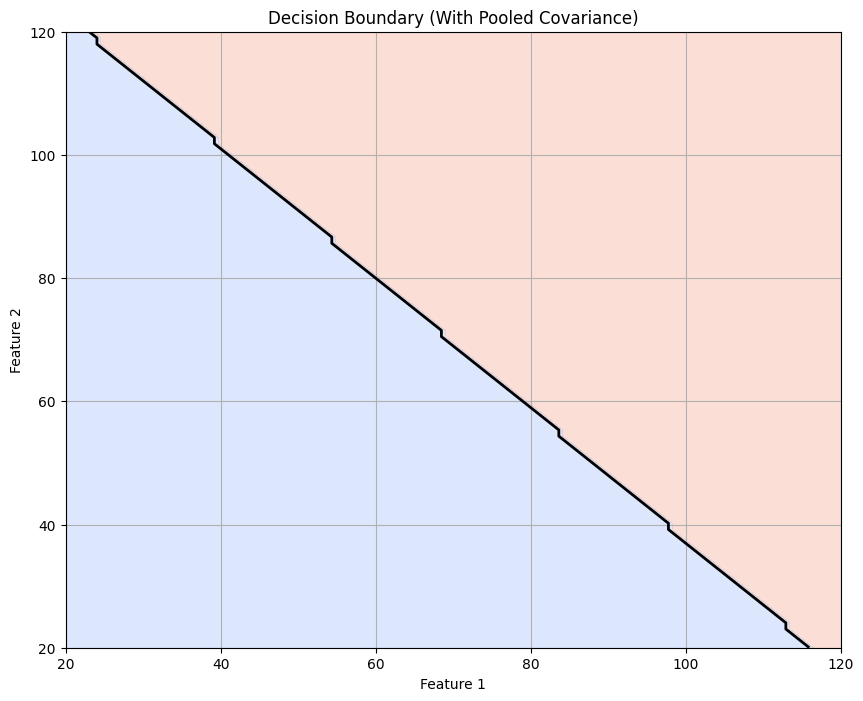

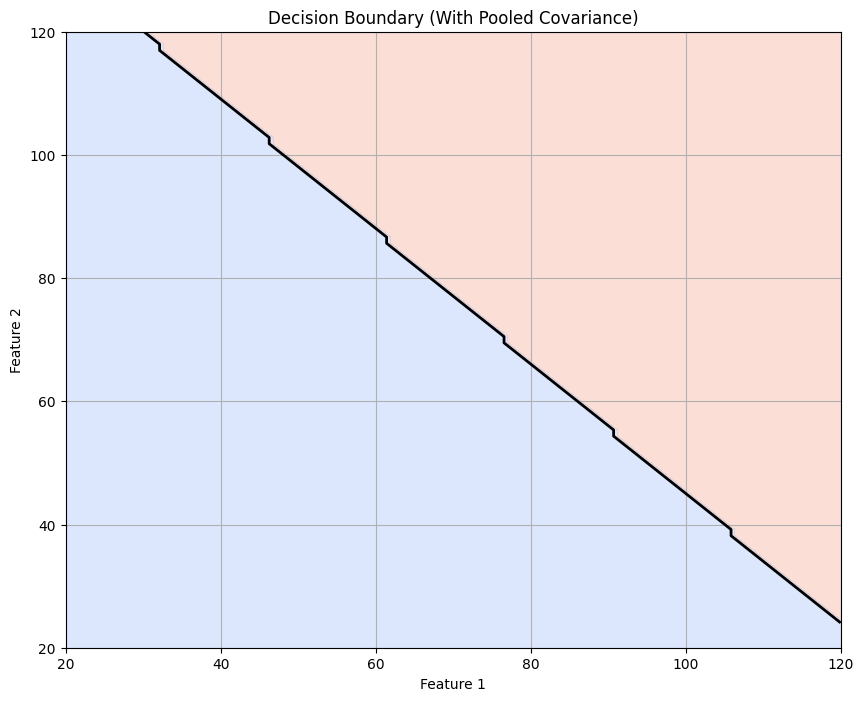

In [10]:
classifier.set_classes(r, s)

classifier.pool_variances()

classifier.classes['Resting'].params['prior'] = 0.5 
classifier.classes['Stressed'].params['prior'] = 0.5 

predpooled = []
for point in gpoints:
    predpooled.append(classifier.predict(point))

dmapPool = np.array(predpooled).reshape(X.shape)

cmap = {'Resting': 0, 'Stressed': 1}
pooledNpred = np.vectorize(cmap.get)(dmapPool)

plt.figure(figsize=(10, 8))
levels = np.linspace(0, 1, 3)
plt.contourf(X, Y, pooledNpred, levels=levels, cmap='coolwarm', alpha=0.3)
plt.contour(X, Y, pooledNpred, levels=[0], colors='black', linewidths=2)
plt.title('Decision Boundary (With Pooled Covariance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


classifier.set_classes(r, s)
classifier.pool_variances()

classifier.classes['Resting'].params['prior'] = 0.9
classifier.classes['Stressed'].params['prior'] = 0.1

predadjusted = []
for point in gpoints:
    predadjusted.append(classifier.predict(point))

dmapadjusted = np.array(predadjusted).reshape(X.shape)

cmap = {'Resting': 0, 'Stressed': 1}
pooledNprior = np.vectorize(cmap.get)(dmapadjusted)

plt.figure(figsize=(10, 8))
levels = np.linspace(0, 1, 3)
plt.contourf(X, Y, pooledNprior, levels=levels, cmap='coolwarm', alpha=0.3)
plt.contour(X, Y, pooledNprior, levels=[0], colors='black', linewidths=2)
plt.title('Decision Boundary (With Pooled Covariance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Now this is a lot easier to see the shift in the boundary.